In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file = pd.read_csv('/Users/luisfuentes/Desktop/biotecgen/associationCountAsoCebu.txt', sep='\t', header=0)
score = file["Score"]
file.drop(columns=["Score",	"Unnamed: 16",	"Unnamed: 17"], inplace=True)
file.fillna(0, inplace=True)
score.fillna(0, inplace=True)

In [11]:
file

,Sample,FATTH,FY,MARBL,MAS1CP,MAS2CP,MBLG,MEATP,MTCAS,MY,NM,PL,PY,SF,TEND
0,Bv6748801G,43.0,227.0,30.0,2.0,3.0,5.0,1.0,2.0,160.0,206.0,189.0,206.0,82.0,17.0
1,Bv6748901G,36.0,244.0,32.0,1.0,5.0,5.0,1.0,2.0,175.0,215.0,202.0,217.0,76.0,18.0
2,Bv6749001G,40.0,239.0,31.0,1.0,2.0,5.0,1.0,2.0,164.0,208.0,199.0,207.0,82.0,18.0
3,Bv6749101G,40.0,233.0,32.0,1.0,3.0,5.0,0.0,2.0,162.0,209.0,196.0,206.0,82.0,15.0
4,Bv6749201G,39.0,231.0,28.0,1.0,4.0,5.0,1.0,2.0,164.0,203.0,194.0,211.0,82.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Bv6756701G,35.0,218.0,29.0,1.0,3.0,4.0,1.0,2.0,161.0,197.0,189.0,202.0,85.0,19.0
80,Bv6756801G,34.0,238.0,34.0,1.0,4.0,6.0,1.0,2.0,167.0,209.0,198.0,214.0,85.0,19.0
81,Bv6756901G,38.0,235.0,28.0,1.0,3.0,4.0,1.0,2.0,171.0,198.0,182.0,212.0,77.0,18.0
82,Bv6757001G,36.0,237.0,34.0,2.0,5.0,5.0,1.0,2.0,178.0,208.0,200.0,216.0,83.0,21.0


In [10]:
print(f'Cantidad de filas y columnas {file.shape}') # Validar las dimensiones del conjunto de datos
print(f'Nombre columnas {file.columns}')
print('Number of instances:', file.shape, 'Number of attributes: ', file.shape[1])
dimensionality = file.shape[1]/file.shape[0]
print('Dimensionality of dataset is:', dimensionality)
print(file.dtypes)

Cantidad de filas y columnas (84, 15)
Nombre columnas Index(['Sample', 'FATTH', 'FY', 'MARBL', 'MAS1CP', 'MAS2CP', 'MBLG', 'MEATP',
       'MTCAS', 'MY', 'NM', 'PL', 'PY', 'SF', 'TEND'],
      dtype='object')
Number of instances: (84, 15) Number of attributes:  15
Dimensionality of dataset is: 0.17857142857142858
Sample     object
FATTH     float64
FY        float64
MARBL     float64
MAS1CP    float64
MAS2CP    float64
MBLG      float64
MEATP     float64
MTCAS     float64
MY        float64
NM        float64
PL        float64
PY        float64
SF        float64
TEND      float64
dtype: object


In [14]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
FATTH,84.0,38.059524,2.490228,28.0,36.00,38.0,40.00,43.0
FY,84.0,233.845238,6.860914,193.0,230.00,234.0,238.25,245.0
MARBL,84.0,30.547619,2.441631,21.0,29.00,31.0,32.00,35.0
MAS1CP,84.0,1.500000,0.611142,1.0,1.00,1.0,2.00,3.0
MAS2CP,84.0,3.619048,1.107529,1.0,3.00,4.0,5.00,6.0
MBLG,84.0,5.000000,0.905139,2.0,5.00,5.0,5.25,7.0
MEATP,84.0,0.916667,0.278045,0.0,1.00,1.0,1.00,1.0
MTCAS,84.0,1.869048,0.339374,1.0,2.00,2.0,2.00,2.0
MY,84.0,167.595238,6.313342,141.0,164.00,168.0,172.00,184.0
NM,84.0,206.011905,6.401231,175.0,202.75,206.0,209.25,220.0


In [15]:
file.skew()

/var/folders/qx/5grd8gwd3pzblwjh964n3hq80000gn/T/ipykernel_3457/78642387.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  file.skew()


FATTH    -0.745622
FY       -2.539153
MARBL    -0.845104
MAS1CP    0.811060
MAS2CP   -0.172634
MBLG     -0.499301
MEATP    -3.070213
MTCAS    -2.227916
MY       -0.640122
NM       -1.196794
PL       -1.130740
PY       -2.008288
SF       -3.855751
TEND     -0.590624
dtype: float64

/var/folders/qx/5grd8gwd3pzblwjh964n3hq80000gn/T/ipykernel_3457/3931289240.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  file.hist(ax=ax)


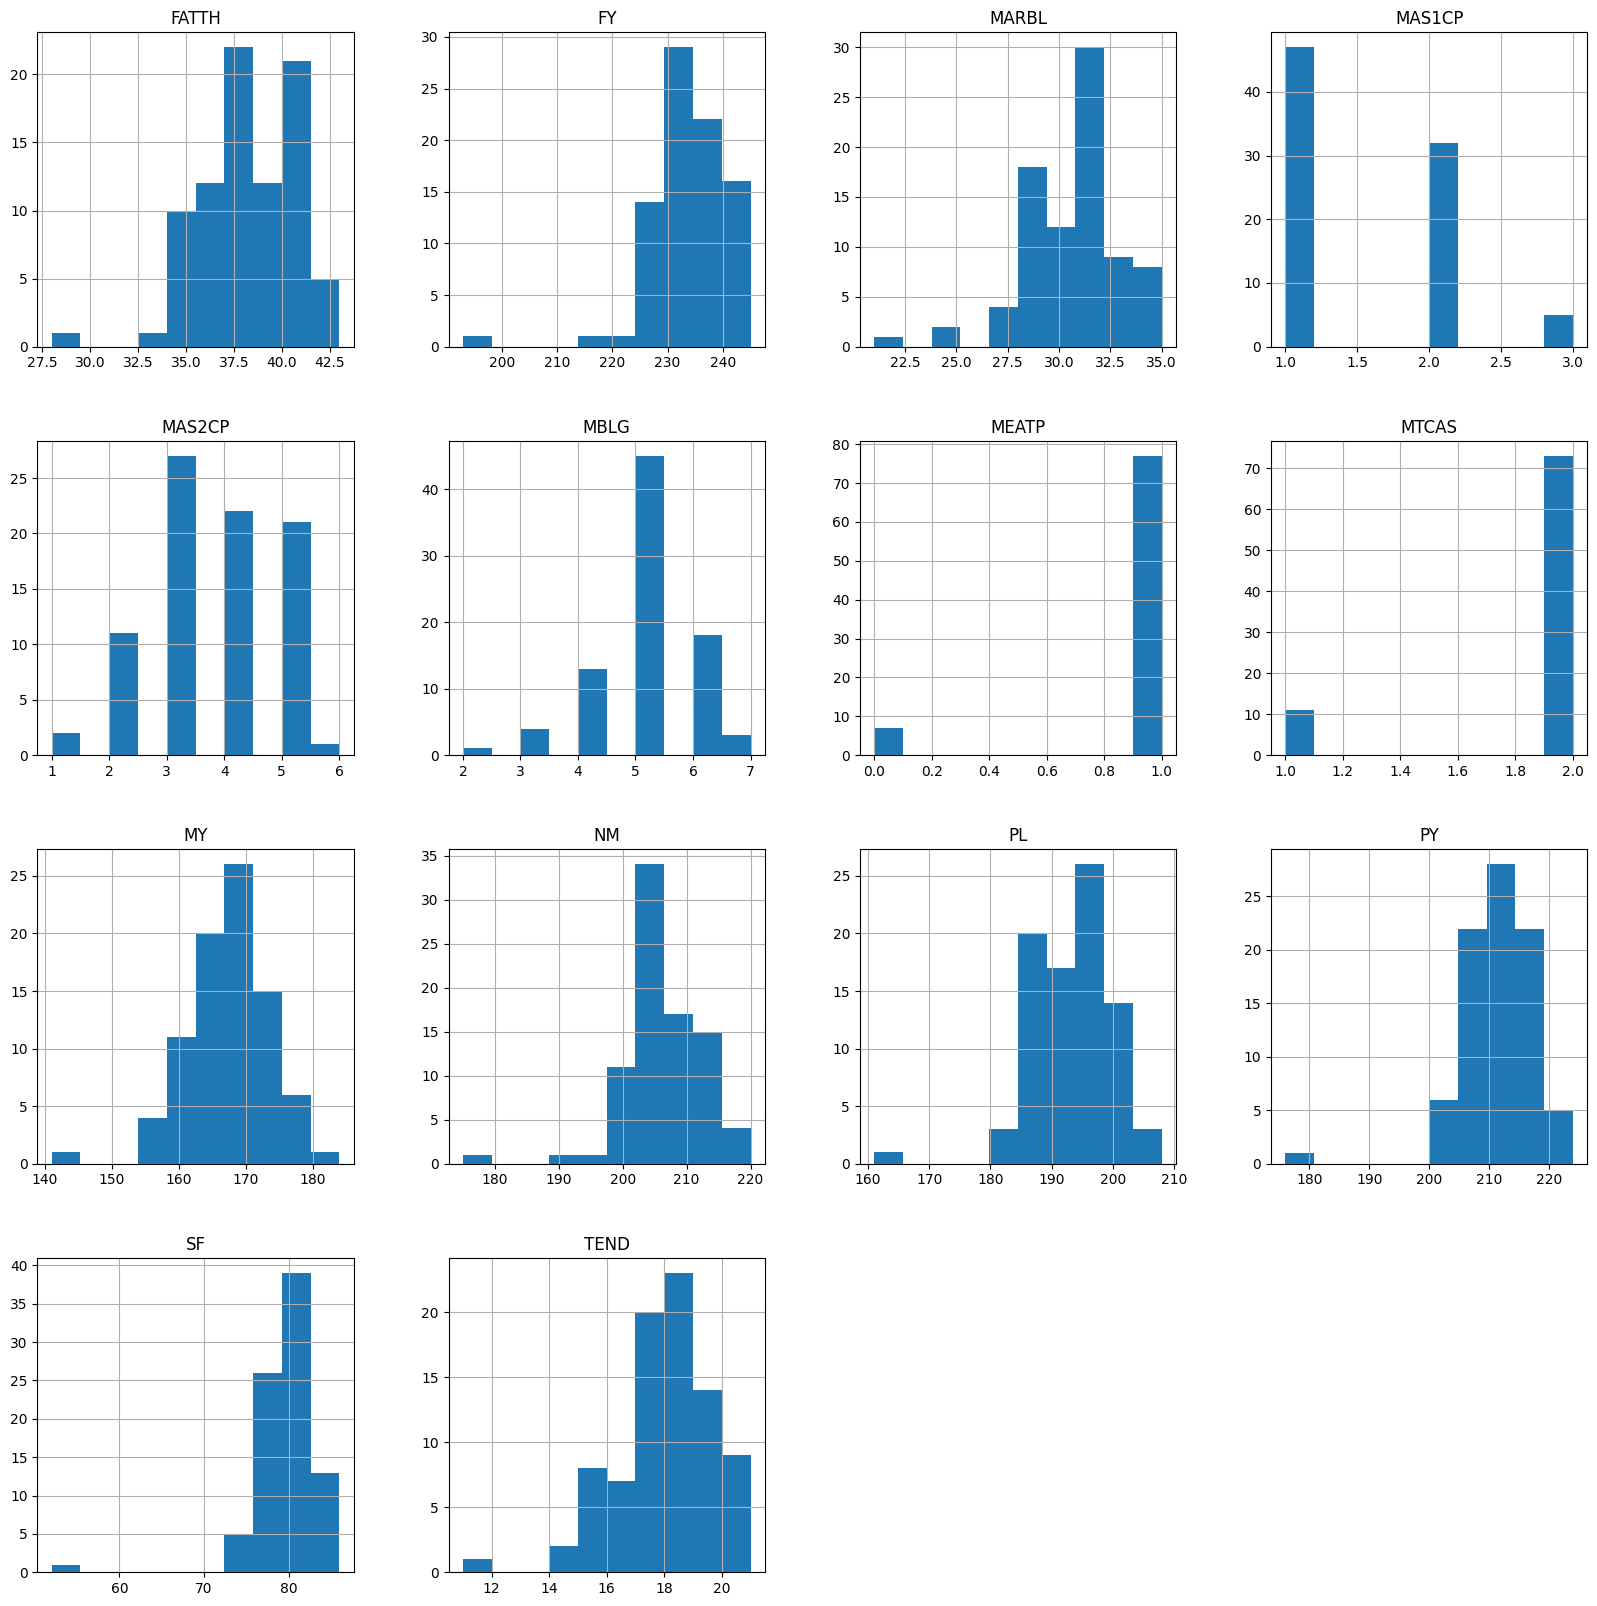

In [17]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
file.hist(ax=ax)
plt.show()

/var/folders/qx/5grd8gwd3pzblwjh964n3hq80000gn/T/ipykernel_3457/1400468836.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  print(file.plot(ax=ax, kind='box',subplots = True, layout= (5,4), sharex = False))


FATTH        AxesSubplot(0.125,0.747241;0.168478x0.132759)
FY        AxesSubplot(0.327174,0.747241;0.168478x0.132759)
MARBL     AxesSubplot(0.529348,0.747241;0.168478x0.132759)
MAS1CP    AxesSubplot(0.731522,0.747241;0.168478x0.132759)
MAS2CP       AxesSubplot(0.125,0.587931;0.168478x0.132759)
MBLG      AxesSubplot(0.327174,0.587931;0.168478x0.132759)
MEATP     AxesSubplot(0.529348,0.587931;0.168478x0.132759)
MTCAS     AxesSubplot(0.731522,0.587931;0.168478x0.132759)
MY           AxesSubplot(0.125,0.428621;0.168478x0.132759)
NM        AxesSubplot(0.327174,0.428621;0.168478x0.132759)
PL        AxesSubplot(0.529348,0.428621;0.168478x0.132759)
PY        AxesSubplot(0.731522,0.428621;0.168478x0.132759)
SF            AxesSubplot(0.125,0.26931;0.168478x0.132759)
TEND       AxesSubplot(0.327174,0.26931;0.168478x0.132759)
dtype: object


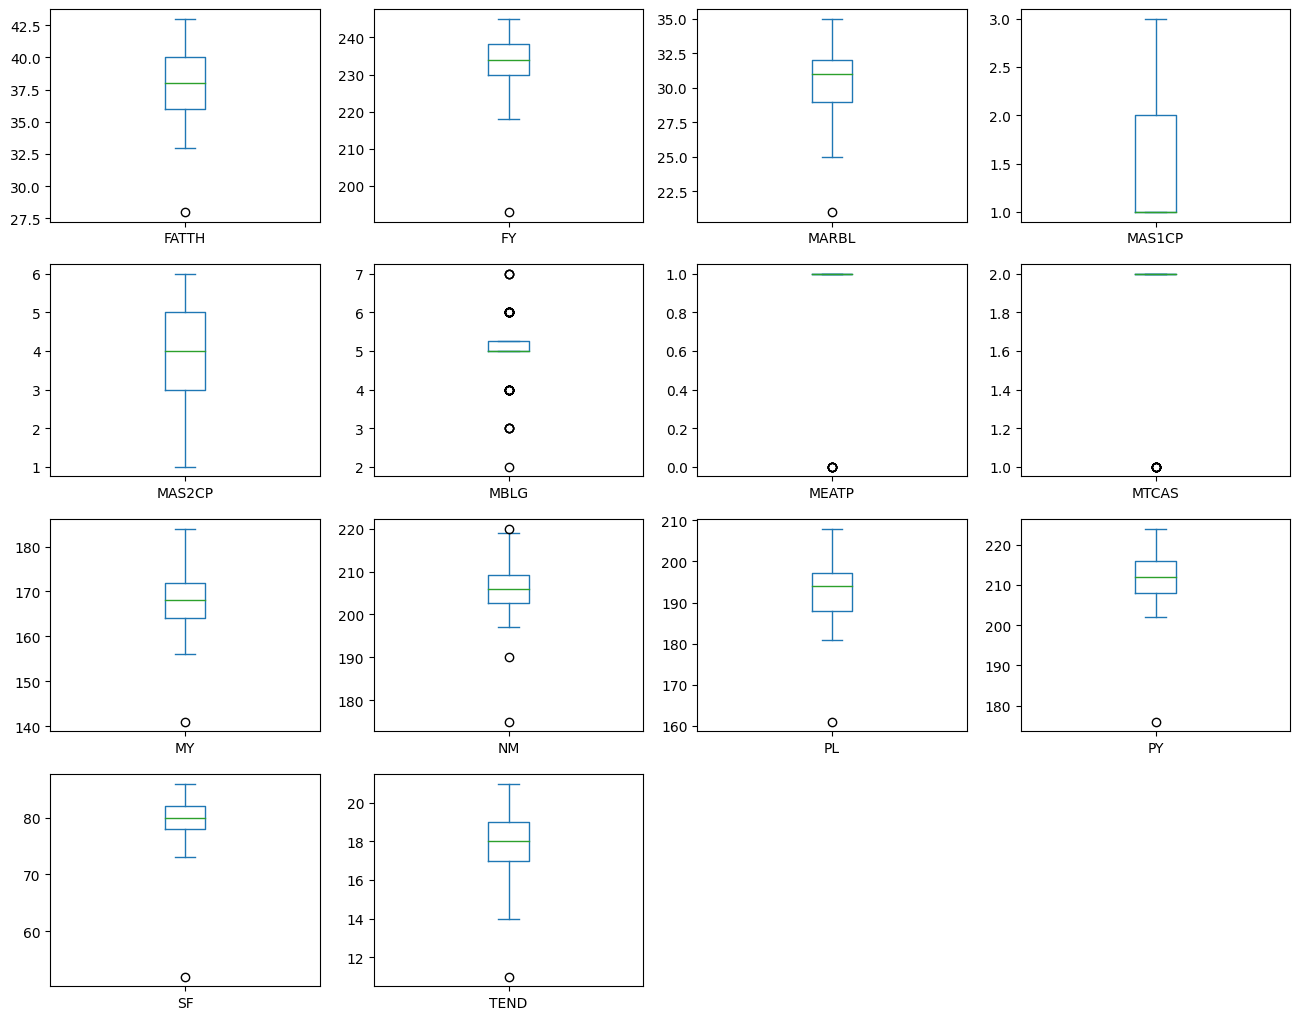

In [20]:
fig = plt.figure(figsize =(16,16))
ax = fig.gca()
print(file.plot(ax=ax, kind='box',subplots = True, layout= (5,4), sharex = False))
plt.show()

/var/folders/qx/5grd8gwd3pzblwjh964n3hq80000gn/T/ipykernel_3457/2889957838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = file.corr(method='pearson')


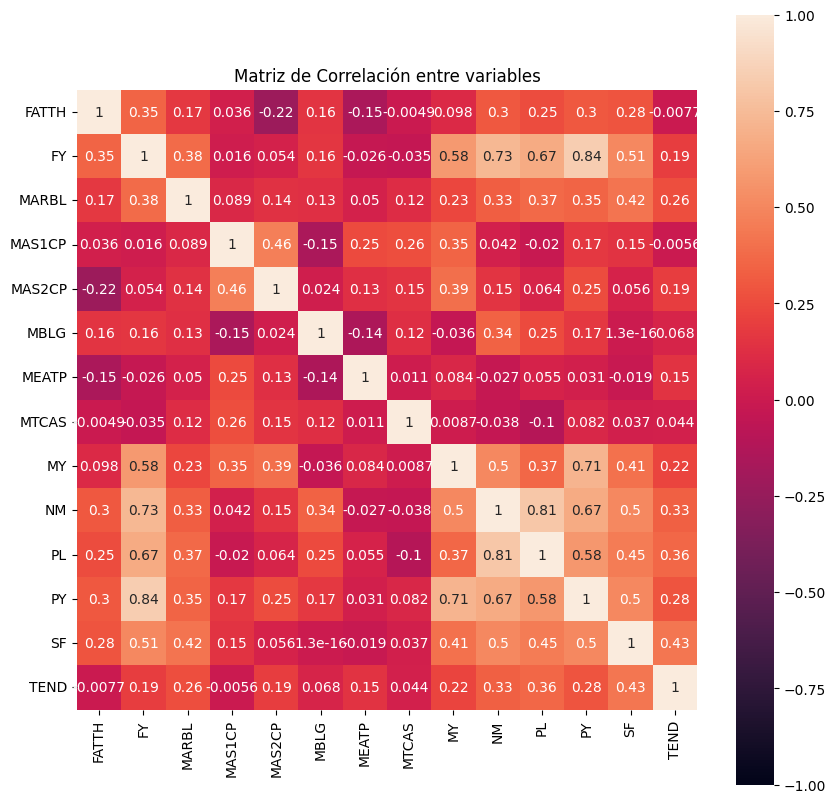

In [29]:
corr = file.corr(method='pearson')
plt.figure(figsize = (10,10))
ax= sns.heatmap(corr, vmax = 1 , vmin = -1, square = True , annot = True)
plt.title("Matriz de Correlación entre variables")
plt.show()

In [ ]:
# PCA

In [30]:
X = file.iloc[:, 1:15].values
Y = file.iloc[:, 0].values

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.99586134, -1.00370747, -0.22563121, ..., -0.87294031,
         0.55396167, -0.32132293],
       [-0.83200967,  1.48897822,  0.5984132 , ...,  0.8691695 ,
        -0.92326945,  0.25295635],
       [ 0.78391662,  0.75583537,  0.186391  , ..., -0.71456669,
         0.55396167,  0.25295635],
       ...,
       [-0.02404652,  0.16932109, -1.04967561, ...,  0.07730141,
        -0.67706427,  0.25295635],
       [-0.83200967,  0.46257823,  1.4224576 , ...,  0.71079589,
         0.80016686,  1.97579416],
       [ 1.59187976,  0.6092068 ,  1.8344798 , ...,  0.71079589,
         0.30775648, -0.32132293]])

In [40]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 9.65365179e+00, -4.92298145e+00, -6.86869457e-01,
        -4.80086168e+00,  5.04662626e+00,  1.43904064e+00,
         3.75799208e+00],
       [-1.71339909e+01, -7.21073826e-01,  1.71575344e+00,
         7.41161280e+00, -5.53516528e-01, -2.42146625e+00,
        -2.53219114e+00],
       [-3.22181976e+00, -7.78158753e+00, -2.06951112e+00,
        -1.55403942e+00, -7.09661334e-01, -5.31163881e+00,
         8.88609043e-01],
       [ 1.77792739e+00, -8.20983930e+00, -1.20010182e-01,
        -2.54005126e+00,  2.18060942e+00, -2.66720390e+00,
         1.14152005e+00],
       [ 3.57827335e+00, -2.16410203e+00, -6.97934762e-01,
        -2.46646877e+00, -1.58534025e+00,  2.02869252e+00,
         1.44545901e+00],
       [-5.32744389e+00, -7.25276760e+00,  8.90895197e+00,
        -1.18108533e+00, -2.31393766e-01, -2.35702676e+00,
        -1.45992792e+00],
       [-2.46448787e+00, -8.90690796e-01,  1.34943171e-01,
        -1.15750980e+00, -1.08441079e+00,  1.99110504e+00,
        -2.9261458

In [50]:
labels = {str(i): f"PC {i+1}" for i in range(3)}
fig = px.scatter_matrix(
    X_pca,
    dimensions=range(3),
    labels=labels,
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
## Kmeans clustering

In [51]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [52]:
#elbow method

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 42,
}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

5

In [53]:
# BIC method    
from sklearn.mixture import GaussianMixture
n_components = range(1, 11)

gm = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X) for n in n_components]

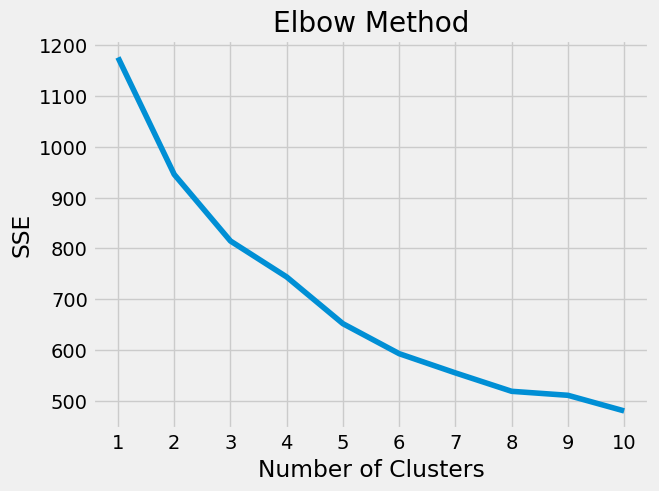

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

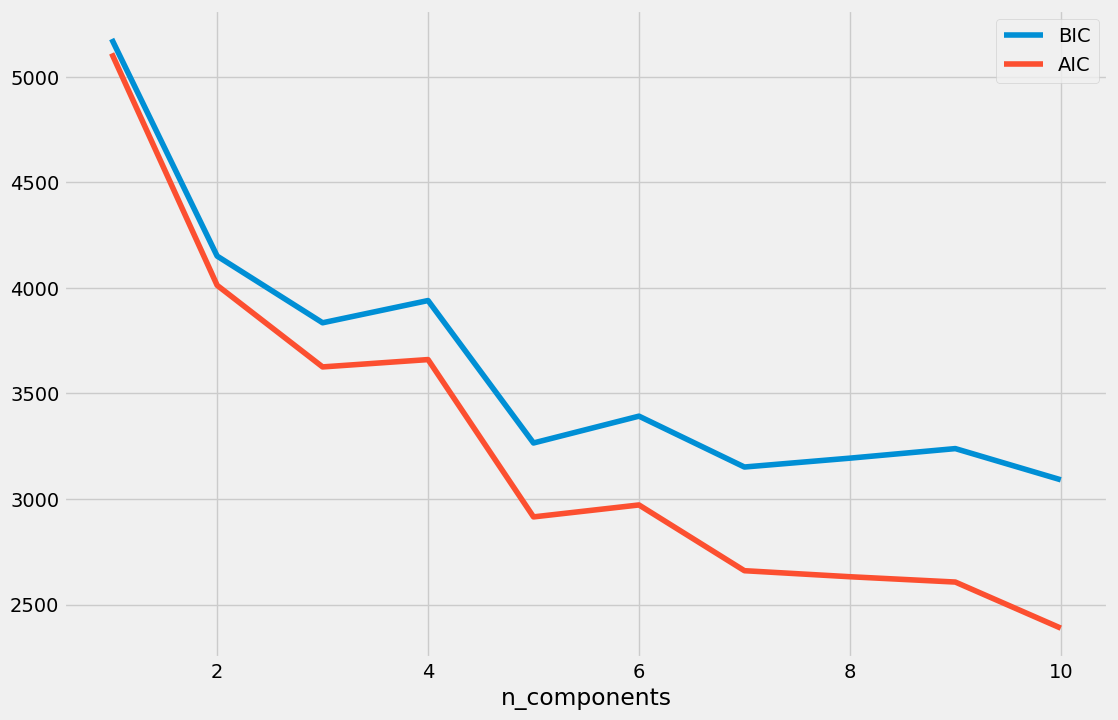

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(n_components, [m.bic(X) for m in gm], label='BIC')
plt.plot(n_components, [m.aic(X) for m in gm], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

In [56]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=1000,
    random_state=42
)

In [57]:
kmeans.fit(X_pca)
y_kmeans = kmeans.fit_predict(X_pca)
y_kmeansU = np.unique(y_kmeans)
y_kmeansU

array([0, 1, 2, 3, 4], dtype=int32)

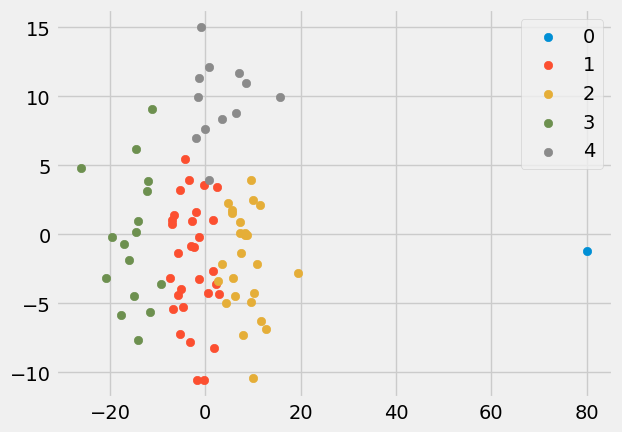

In [58]:
for i in y_kmeansU:
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=i)
plt.legend()
plt.show()

In [ ]:
# multivariate analysis

In [62]:
import pandas as pd2

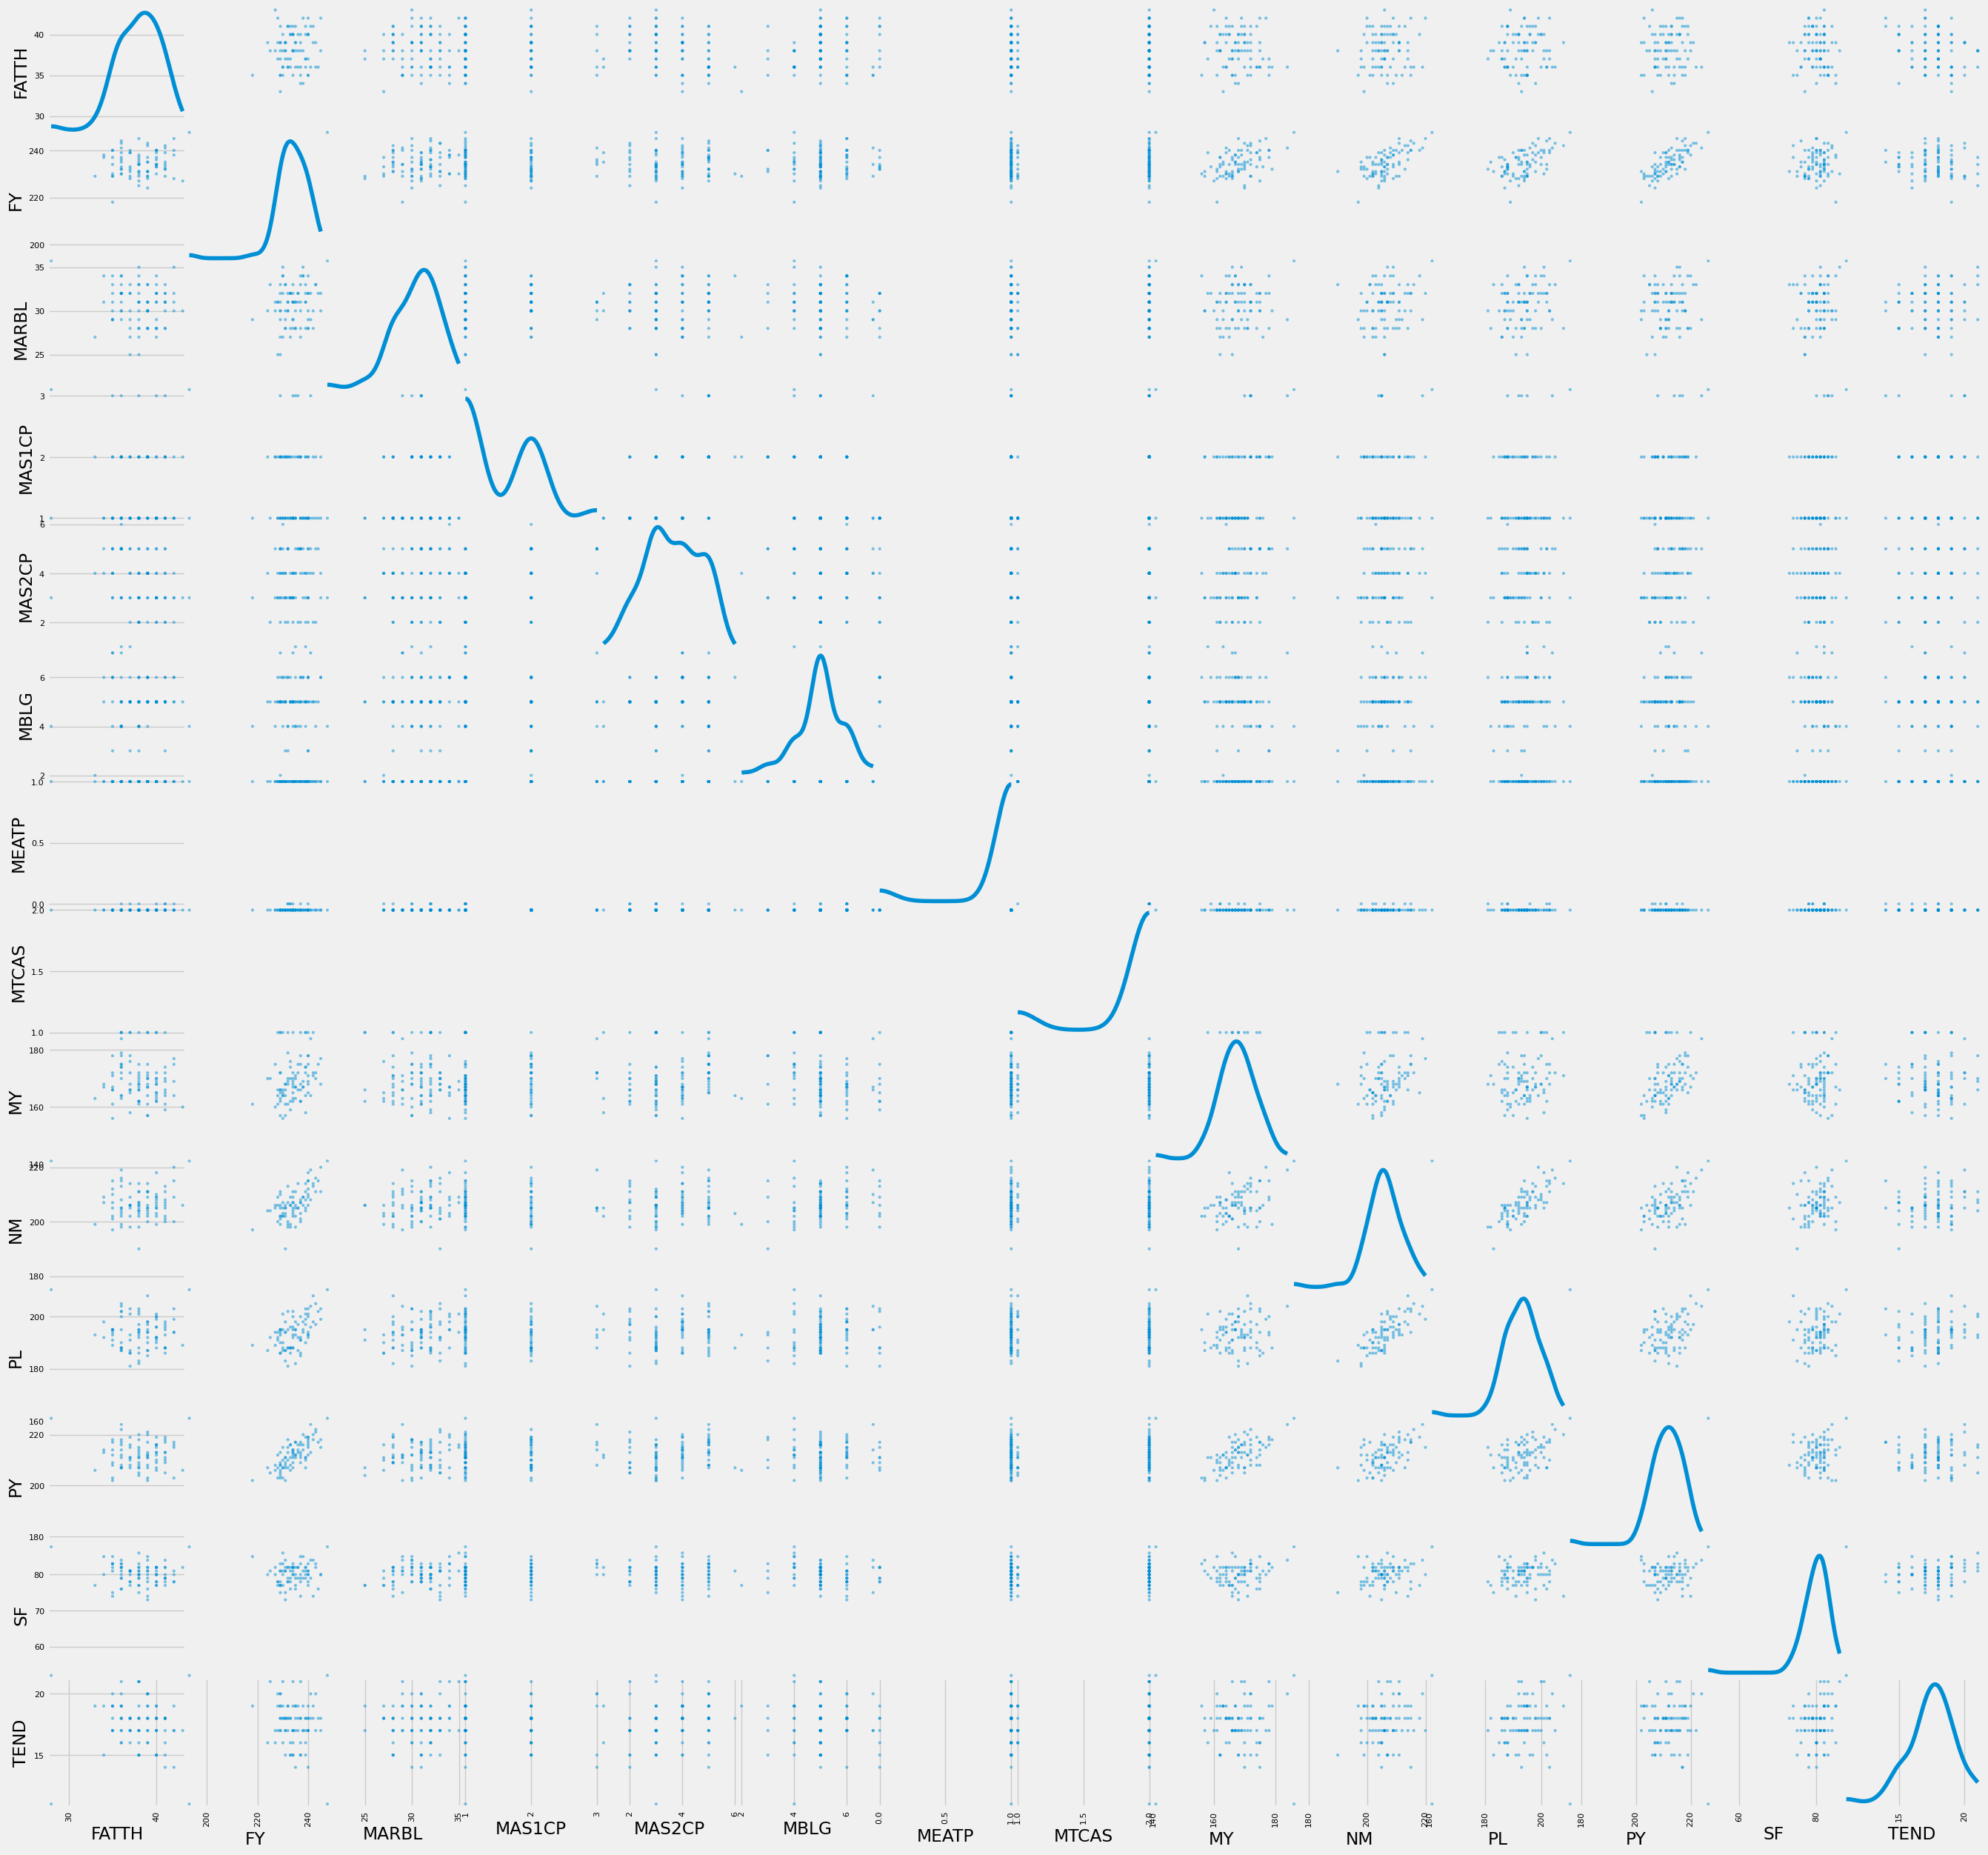

In [68]:
pd2.plotting.scatter_matrix(file.loc[:,"FATTH":"TEND"], figsize=(30, 30), diagonal='kde')
plt.show()